In [2]:
# loading packages

import numpy as np # numpy for making arrays and doing math on them
import pandas as pd # pandas for importing spreadsheet data and manipulating it
import scipy as sp # scipy for solving equations
import matplotlib as mpl # matplotlib for graphing
import matplotlib.pyplot as plt # the pyplot functions from mathplotlib as plt
import math # math for things like constants (e or pi) and some simple math
import random
import numpy as np
import warnings
import seaborn as sns
import matplotlib
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'
         }
pylab.rcParams.update(params)
import matplotlib.ticker as mticker  
#set the style
sns.set_style("whitegrid")



from sklearn.metrics import r2_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [3]:
# read training
X_train_ctcf = pd.read_csv("train_ctcf.csv").transpose()
X_train_ctcf = X_train_ctcf.values 

#X_train_ctcf = np.exp(X_train_ctcf)
#X_train_ctcf = X_train_ctcf[:, :, np.newaxis]
#X_train_ctcf[np.isnan(X_train_ctcf)] = 0



X_train_h3k9me3 = pd.read_csv("train_h3k9me3.csv").transpose()
X_train_h3k9me3 = X_train_h3k9me3.values 
#X_train_h3k9me3 = np.exp(X_train_h3k9me3)
#X_train_h3k9me3 = X_train_h3k9me3[:, :, np.newaxis]
#X_train_h3k9me3[np.isnan(X_train_h3k9me3)] = 0



X_train_rna = pd.read_csv("train_rna.csv").transpose()
X_train_rna = X_train_rna.values 
#X_train_rna = np.exp(X_train_rna)
#X_train_rna = X_train_rna[:, :, np.newaxis]
#X_train_rna[np.isnan(X_train_rna)] = 0



y_train= pd.read_csv("train_DNase.csv").transpose()
#y_train = np.exp(y_train)
y_train= y_train.values.ravel()

In [3]:
# read validation data
X_val_ctcf = pd.read_csv("val_ctcf.csv").transpose()
X_val_ctcf = X_val_ctcf.values 
#X_val_ctcf = X_val_ctcf[:, :, np.newaxis]
#X_val_ctcf[np.isnan(X_val_ctcf)] = 0



X_val_h3k9me3 = pd.read_csv("val_h3k9me3.csv").transpose()
X_val_h3k9me3 = X_val_h3k9me3.values 
#X_val_h3k9me3 = X_val_h3k9me3[:, :, np.newaxis]
#X_val_h3k9me3[np.isnan(X_val_h3k9me3)] = 0



X_val_rna = pd.read_csv("val_rna.csv").transpose()
X_val_rna = X_val_rna.values 
#X_val_rna = X_val_rna[:, :, np.newaxis]
#X_val_rna[np.isnan(X_val_rna)] = 0


y_val= pd.read_csv("val_DNase.csv").transpose()
y_val= y_val.values.ravel()




In [6]:
# read test data
X_test_ctcf = pd.read_csv("test_ctcf.csv").transpose()
X_test_ctcf = X_test_ctcf.values 
#X_test_ctcf = np.exp(X_test_ctcf)
#X_test_ctcf = X_test_ctcf[:, :, np.newaxis]
#X_test_ctcf[np.isnan(X_test_ctcf)] = 0




X_test_h3k9me3 = pd.read_csv("test_h3k9me3.csv").transpose()
X_test_h3k9me3 = X_test_h3k9me3.values 
#X_test_h3k9me3 = np.exp(X_test_h3k9me3)
#X_test_h3k9me3 = X_test_h3k9me3[:, :, np.newaxis]
#X_test_h3k9me3[np.isnan(X_test_h3k9me3)] = 0



X_test_rna = pd.read_csv("test_rna.csv").transpose()
X_test_rna = X_test_rna.values
#X_test_rna = np.exp(X_test_rna)
#X_test_rna = X_test_rna[:, :, np.newaxis]
#X_test_rna[np.isnan(X_test_rna)] = 0


y_test= pd.read_csv("test_DNase.csv").transpose()
#y_test = np.exp(y_test)
y_test= y_test.values.ravel()

In [ ]:
# grid search to find the best layer numbers

"""
from sklearn.model_selection import GridSearchCV

# Generate some random data for demonstration
X, y = make_regression(n_samples=1000, n_features=5, noise=0.5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(20,),(50,), (100,), (50, 50), (100, 100)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Create an instance of the MLPRegressor
mlp = MLPRegressor(random_state=1)

# Create an instance of the GridSearchCV
grid_search = GridSearchCV(mlp, param_grid=param_grid, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_ctcf, y_train_ctcf)

# Print out the best parameters and score
print("Best parameters: {}".format(grid_search.best_params_))
print("Best score: {:.3f}".format(grid_search.best_score_))
""""

# the best setting is the most simple one

Text(0.5, 1.0, 'CTCF prediction')

Text(0.5, 0, 'True Value')

Text(0, 0.5, 'Predicted Value')

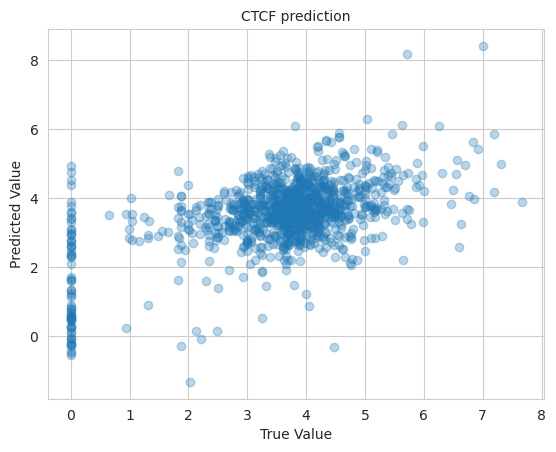

1.2577465834879469
0.2501123858045283


In [44]:
# Train MLP model -- CTCF
model = MLPRegressor(hidden_layer_sizes = (20,))
ctcf_model = model.fit(X_train_ctcf, y_train)
y_test_pred = ctcf_model.predict(X_test_ctcf)

plt.scatter(y_test, y_test_pred, alpha= 0.3)
plt.title("CTCF prediction")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()
print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_test, y_test_pred))


Text(0.5, 1.0, 'H3K9me3 prediction')

Text(0.5, 0, 'True Value')

Text(0, 0.5, 'Predicted Value')

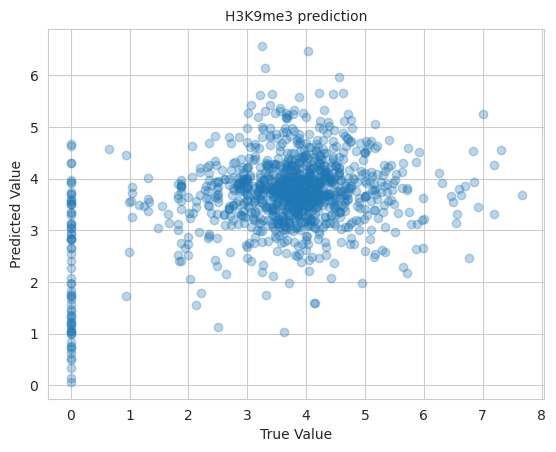

1.5334714112114964
0.08572105614360248


In [45]:
# Train MLP model -- H3K9Me3
model = MLPRegressor(hidden_layer_sizes = (20,))
h3k9me3_model = model.fit(X_train_h3k9me3, y_train)

y_test_pred = h3k9me3_model.predict(X_test_h3k9me3)
plt.scatter(y_test, y_test_pred, alpha= 0.3)
plt.title("H3K9me3 prediction")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()
print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_test, y_test_pred))

Text(0.5, 1.0, 'RNAseq prediction')

Text(0.5, 0, 'True Value')

Text(0, 0.5, 'Predicted Value')

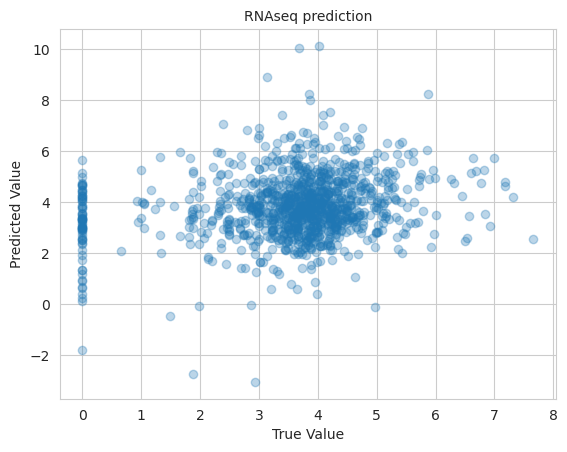

2.6283432430533287
-0.5670581575775255


In [47]:
# Train MLP model -- RNase-seq
model = MLPRegressor(hidden_layer_sizes = (30,))
rna_model = model.fit(X_train_rna, y_train)

y_test_pred = rna_model.predict(X_test_rna)
plt.scatter(y_test, y_test_pred, alpha= 0.3)
plt.title("RNAseq prediction")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()
print(mean_squared_error(y_test, y_test_pred))
print(r2_score(y_test, y_test_pred))

SVR()

Text(0.5, 1.0, 'CTCF prediction')

Text(0.5, 0, 'True Value')

Text(0, 0.5, 'Predicted Value')

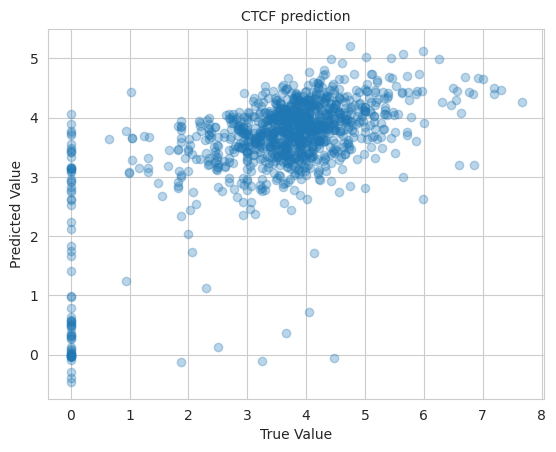

1.0111572904356787
0.3971326672194969


In [48]:
# Try SVR to see if it can perform better

from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')
reg.fit(X_train_ctcf, y_train)
pred_y = reg.predict(X_test_ctcf)

plt.scatter(y_test, pred_y, alpha= 0.3)
plt.title("CTCF prediction")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()

print(mean_squared_error(y_test, pred_y))
print(r2_score(y_test, pred_y))

SVR()

Text(0.5, 1.0, 'H3K9me3 prediction')

Text(0.5, 0, 'True Value')

Text(0, 0.5, 'Predicted Value')

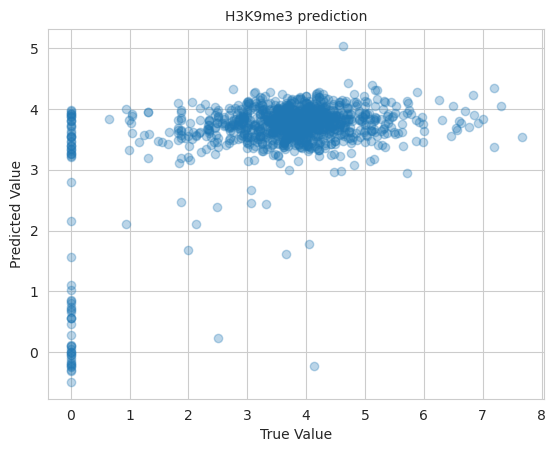

1.2538191232232252
0.2524539972598281


In [49]:
reg = SVR(kernel = 'rbf')
reg.fit(X_train_h3k9me3, y_train)
pred_y = reg.predict(X_test_h3k9me3)

plt.scatter(y_test, pred_y, alpha= 0.3)
plt.title("H3K9me3 prediction")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()

print(mean_squared_error(y_test, pred_y))
print(r2_score(y_test, pred_y))

SVR()

Text(0.5, 1.0, 'RNAseq prediction')

Text(0.5, 0, 'True Value')

Text(0, 0.5, 'Predicted Value')

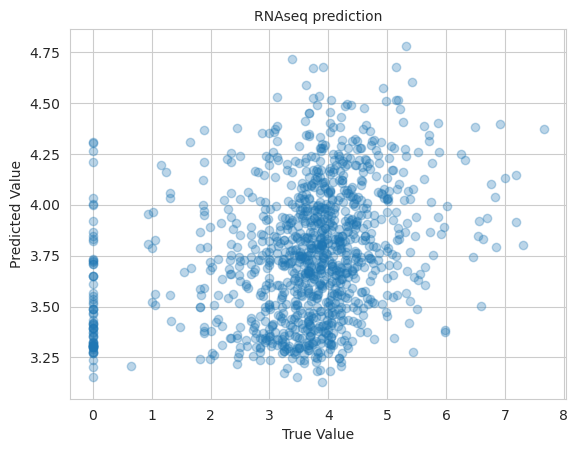

1.5635894486034132
0.06776422485455069


In [50]:
reg = SVR(kernel = 'rbf')
reg.fit(X_train_rna, y_train)
pred_y = reg.predict(X_test_rna)

plt.scatter(y_test, pred_y, alpha= 0.3)
plt.title("RNAseq prediction")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()


print(mean_squared_error(y_test, pred_y))
print(r2_score(y_test, pred_y))

In [51]:
reg = SVR(kernel = 'rbf')
reg.fit(X_train_ctcf, y_train)
pred_y = reg.predict(X_test_ctcf)



model = MLPRegressor(hidden_layer_sizes = (20,))
h3k9me3_model = model.fit(X_train_h3k9me3, y_train)

y_test_pred = h3k9me3_model.predict(X_test_h3k9me3)

SVR()

Text(0.5, 1.0, 'Final prediction')

Text(0.5, 0, 'True Value')

Text(0, 0.5, 'Predicted Value')

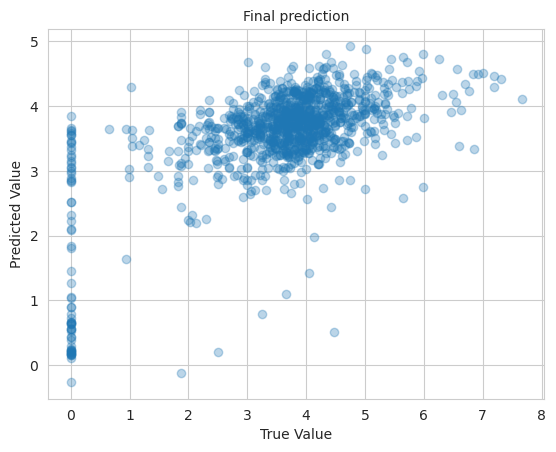

1.0040068104000202
0.40139589200951975


In [53]:
# combine the SVR result of CTCF and MLP model of H3K9me3 based on R^2

y_final = (pred_y*4 + y_test_pred)/5

plt.scatter(y_test, y_final, alpha= 0.3)
plt.title("Final prediction")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()


print(mean_squared_error(y_test, y_final))
print(r2_score(y_test, y_final))